In [1]:
# Load necessary libraries
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('water.csv')

df.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,issafe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,Yes
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,Yes
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,No
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,Yes
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,Yes


In [3]:
df.isna().sum(axis=0)

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
issafe         0
dtype: int64

In [6]:
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000,15079.000000
mean,0.489814,14.313087,0.086202,1.281407,0.023755,1.665849,0.154161,0.614372,0.771194,0.169536,0.174304,0.056425,7.586046,0.943099,0.003083,15.611872,2.773986,0.049830,0.101243,0.040556
std,1.028002,8.892335,0.200598,1.024942,0.033158,2.123873,0.221322,0.583325,0.435860,0.288149,0.320505,0.062392,5.087422,0.618841,0.003130,17.137809,1.968339,0.028781,0.117178,0.027758
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.590000,0.001000,0.560000,0.002000,0.090000,0.030000,0.080000,0.400000,0.000000,0.000000,0.008000,3.280000,0.430000,0.001000,2.040000,1.000000,0.030000,0.030000,0.020000
50%,0.070000,14.250000,0.010000,0.990000,0.004000,0.460000,0.060000,0.440000,0.760000,0.000000,0.000000,0.014000,7.080000,0.830000,0.001000,7.190000,2.580000,0.050000,0.060000,0.040000
75%,0.170000,22.200000,0.050000,1.790000,0.040000,2.910000,0.100000,1.050000,1.160000,0.260000,0.008000,0.106000,10.490000,1.460000,0.006000,27.850000,4.210000,0.070000,0.090000,0.060000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.200000


In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Column '{col}' cannot be converted to numeric.")
    # Drop rows with NaN values in the specified column
    df.dropna(subset=['ammonia'], inplace=True)

# Check data types after conversion
print(df.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
issafe         float64
dtype: object


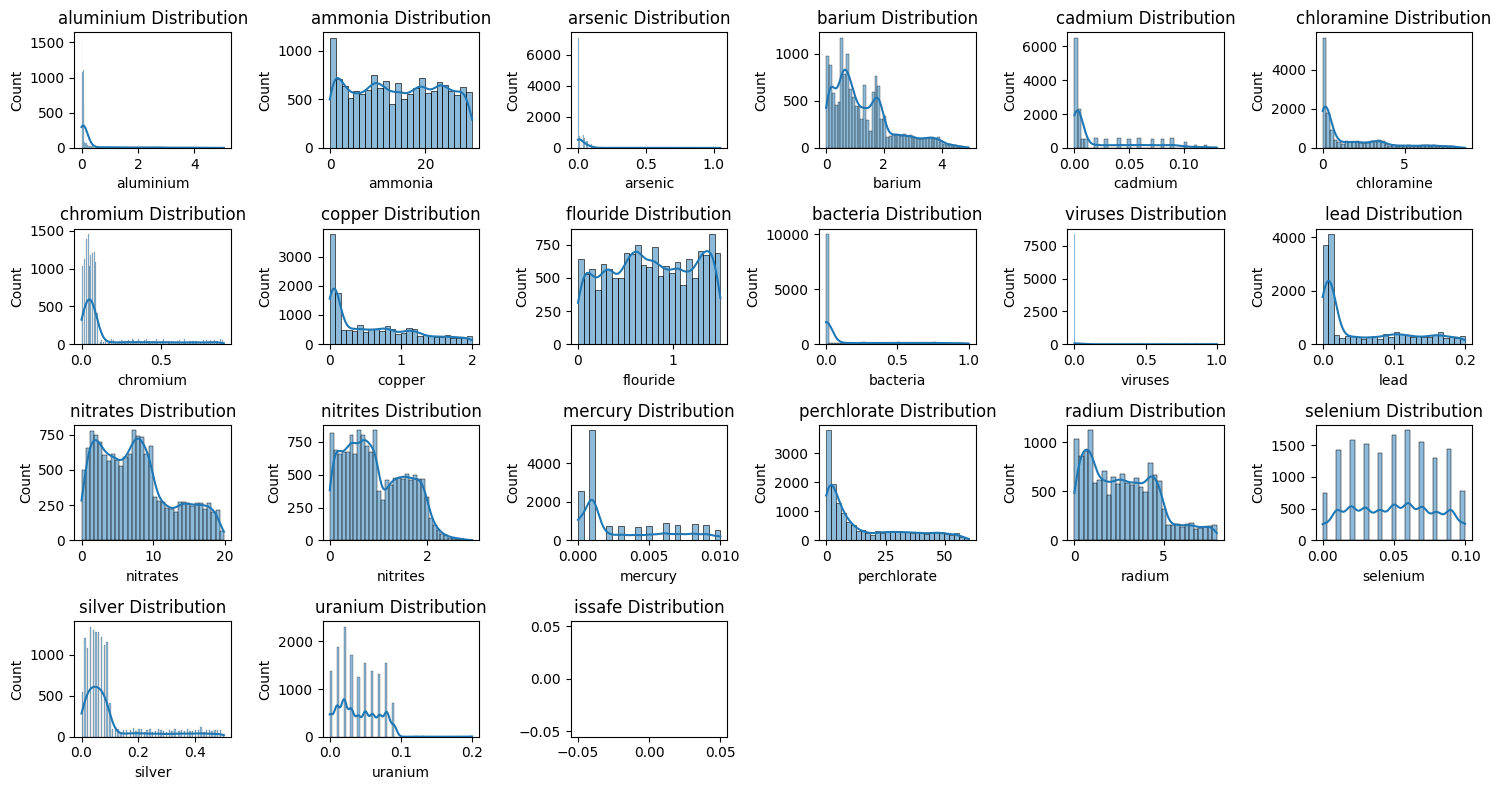

In [8]:
# Define the number of rows and columns for the subplot grid
num_rows = 4
num_cols = (len(df.columns) + num_rows - 1) // num_rows  # Calculate the number of columns dynamically

plt.figure(figsize=(15, 8))

for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['issafe'])  # Features
y = df['issafe']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

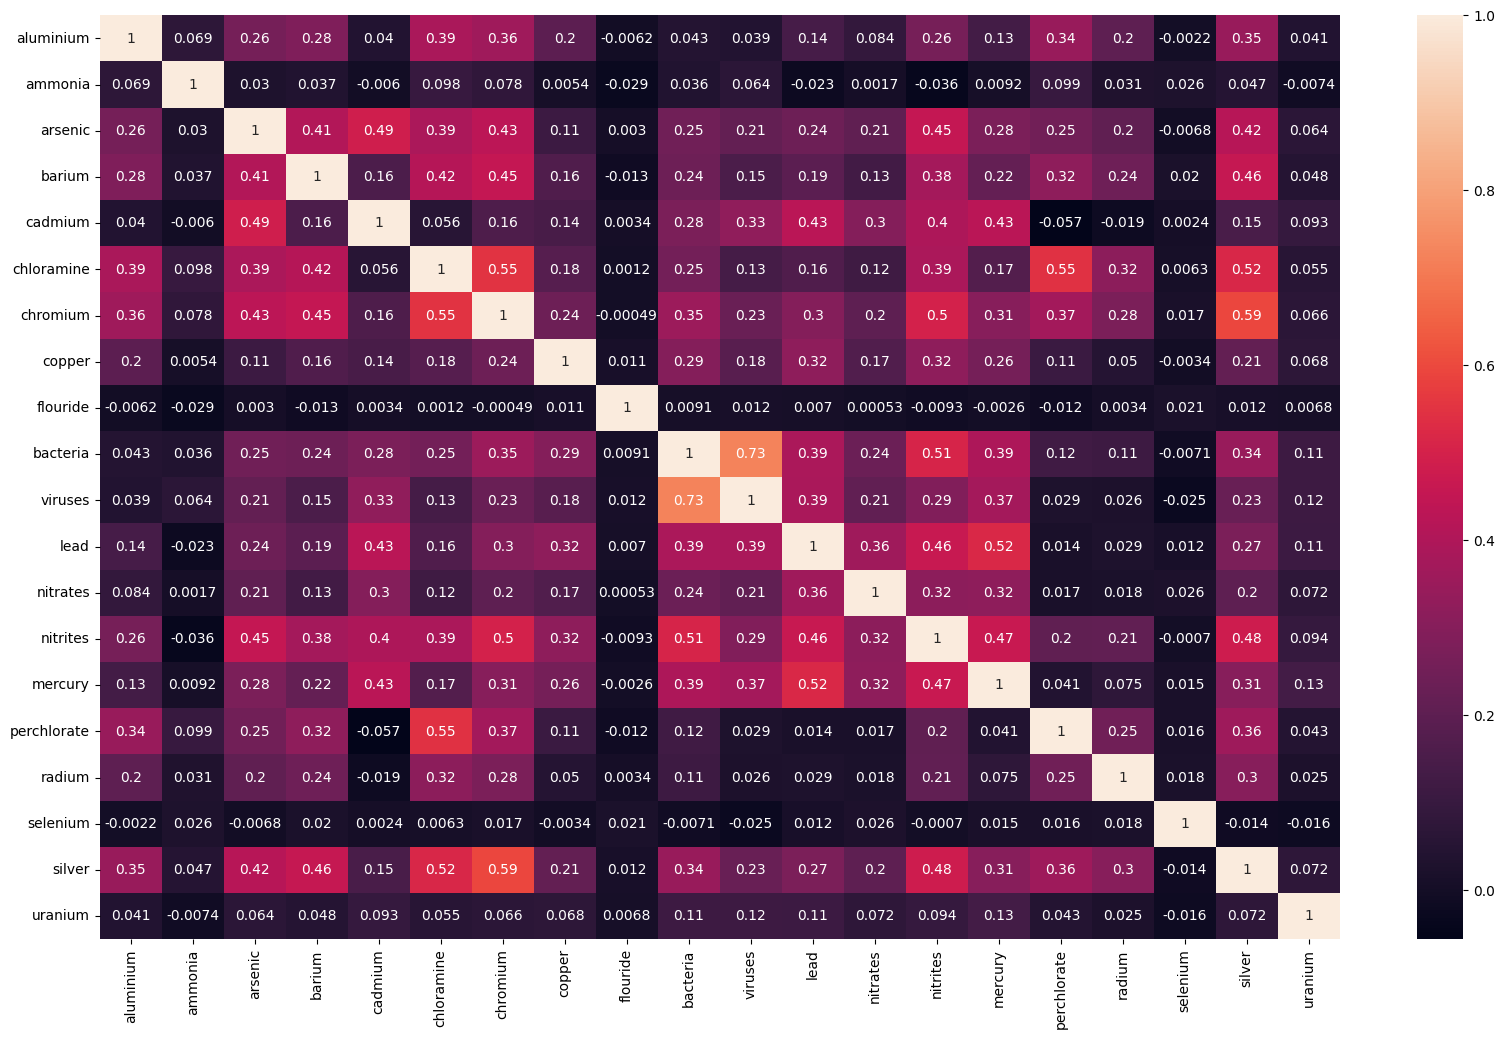

In [11]:
corr = X.corr()

plt.figure(figsize=(20, 12))  # Set the figure size (adjust values as needed)

# Create a heatmap from the correlation matrix
sns.heatmap(corr, annot=True)

# Show the heatmap
plt.show()

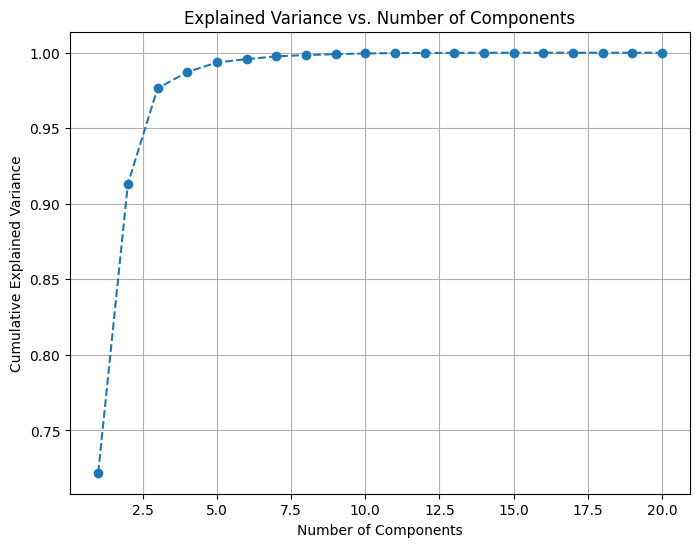

In [12]:
from sklearn.decomposition import PCA

# Initialize PCA and fit to the data
pca = PCA()
pca.fit(X_train)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [13]:
pca = PCA(n_components=4)  # Adjust the number of components as needed
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # For handling missing values

# Assuming you have loaded your data into a DataFrame named 'df'

# Handle missing values in the target variable ('is_safe')
imputer = SimpleImputer(strategy='mean')  # Or 'median' depending on your data
y = imputer.fit_transform(df['issafe'].values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Values for the number of trees
    'max_depth': [None, 5, 10, 15],           # Values for the maximum depth of the trees
}

# Create RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model's performance on the test set (optional)
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1279, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1289, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1081, in check_array
    raise ValueError(
ValueError: Found array with 0 feature(s) (shape=(9650, 0)) while a minimum of 1 is required by RandomForestClassifier.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1279, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1289, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1081, in check_array
    raise ValueError(
ValueError: Found array with 0 feature(s) (shape=(9651, 0)) while a minimum of 1 is required by RandomForestClassifier.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv("water.csv")

# Chuyển đổi cột 'issafe' thành dạng số
data = pd.get_dummies(data, columns=['issafe'])

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop(['issafe_No', 'issafe_Yes'], axis=1)
y = data[['issafe_No', 'issafe_Yes']]  # Chỉnh sửa để lấy cột nhãn sau khi chuyển đổi

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9675066312997348


In [2]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file CSV 
data = pd.read_csv("water.csv")

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop('issafe', axis=1)
y = data['issafe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9399867374005305


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv("water.csv")

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop('issafe', axis=1)
y = data['issafe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8929045092838196


c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv("water.csv")

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop('issafe', axis=1)
y = data['issafe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8159814323607427


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv("water.csv")

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop('issafe', axis=1)
y = data['issafe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Support Vector Machines
model = SVC(probability=True)
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Tính các chỉ số hiệu suất
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)
roc_area = roc_auc_score(y_test, y_proba)
prc_area = average_precision_score(y_test, y_proba, pos_label='Yes')  # Chỉ định pos_label='Yes'

# In ra các chỉ số hiệu suất
print("True Positive Rate (TPR):", recall)
print("False Positive Rate (FPR):", fp / (fp + tn))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Matthews correlation coefficient (MCC):", mcc)
print("ROC Area:", roc_area)
print("PRC Area:", prc_area)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

True Positive Rate (TPR): 0.923318667504714
False Positive Rate (FPR): 0.16140350877192983
Precision: 0.8646262507357269
Recall: 0.923318667504714
F1-score: 0.8930091185410334
Matthews correlation coefficient (MCC): 0.7669367685859111
ROC Area: 0.9469820371166762
PRC Area: 0.9526748377345104

Confusion Matrix:
[[1195  230]
 [ 122 1469]]

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.84      0.87      1425
         Yes       0.86      0.92      0.89      1591

    accuracy                           0.88      3016
   macro avg       0.89      0.88      0.88      3016
weighted avg       0.88      0.88      0.88      3016



In [8]:
#Logistic Regresion
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv("water.csv")

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop('issafe', axis=1)
y = data['issafe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Tính các chỉ số hiệu suất
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)
roc_area = roc_auc_score(y_test, y_proba)
prc_area = average_precision_score(y_test, y_proba, pos_label='Yes')  # Chỉ định pos_label='Yes'

# In ra các chỉ số hiệu suất
print("True Positive Rate (TPR):", recall)
print("False Positive Rate (FPR):", fp / (fp + tn))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("ROC Area:", roc_area)
print("PRC Area:", prc_area)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


True Positive Rate (TPR): 0.9302325581395349
False Positive Rate (FPR): 0.14877192982456142
Precision: 0.8747044917257684
Recall: 0.9302325581395349
F1-score: 0.9016143770941212
Matthews Correlation Coefficient (MCC): 0.7861500607139794
ROC Area: 0.9494463374022737
PRC Area: 0.9578644683866465

Confusion Matrix:
[[1213  212]
 [ 111 1480]]

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.85      0.88      1425
         Yes       0.87      0.93      0.90      1591

    accuracy                           0.89      3016
   macro avg       0.90      0.89      0.89      3016
weighted avg       0.89      0.89      0.89      3016



c:\Users\duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv("water.csv")

# Chia dữ liệu thành features (đặc trưng) và labels (nhãn)
X = data.drop('issafe', axis=1)
y = data['issafe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Tính các chỉ số hiệu suất
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)
roc_area = roc_auc_score(y_test, y_proba)
prc_area = average_precision_score(y_test, y_proba, pos_label='Yes')  # Chỉ định pos_label='Yes'

# In ra các chỉ số hiệu suất
print("True Positive Rate (TPR):", recall)
print("False Positive Rate (FPR):", fp / (fp + tn))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("ROC Area:", roc_area)
print("PRC Area:", prc_area)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

True Positive Rate (TPR): 0.9723444374607165
False Positive Rate (FPR): 0.037192982456140354
Precision: 0.966875
Recall: 0.9723444374607165
F1-score: 0.969602005640865
Matthews Correlation Coefficient (MCC): 0.9354764478661179
ROC Area: 0.9675757275022883
PRC Area: 0.954724387386276

Confusion Matrix:
[[1372   53]
 [  44 1547]]

Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.96      0.97      1425
         Yes       0.97      0.97      0.97      1591

    accuracy                           0.97      3016
   macro avg       0.97      0.97      0.97      3016
weighted avg       0.97      0.97      0.97      3016

